In [13]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [4]:
# define category ordering for ordinal variables
cat_Medu = pd.CategoricalDtype(categories = ['1', '2', '3', '4'], ordered = True)
cat_Fedu = pd.CategoricalDtype(categories = ['1', '2', '3', '4'], ordered = True)
cat_traveltime = pd.CategoricalDtype(categories = ['1', '2', '3', '4'], ordered = True)
cat_studytime = pd.CategoricalDtype(categories = ['1', '2', '3', '4'], ordered = True)
cat_failures = pd.CategoricalDtype(categories = ['1', '2', '3', '4'], ordered = True)

# define variable types
stu_dtypes = {
    'school' : 'category',
    'sex' : 'category',
    'age' : 'int8',
    'address' : 'category',
    'famsize' : 'category',
    'Pstatus' : 'category',
    'Medu' : 'category',
    'Fedu' : 'category',
    'Mjob' : 'category',
    'Fjob' : 'category',
    'reason' : 'category',
    'guardian' : 'category',
    'traveltime' : 'category',
    'studytime' : 'category',
    'failures' : 'category',
    'schoolsup' : 'category',
    'famsup' : 'category',
    'paid' : 'category',
    'activities' : 'category',
    'nursery' : 'category',
    'higher' : 'category',
    'internet' : 'category',
    'romantic' : 'category',
    'famrel' : 'int8',
    'freetime' : 'int8',
    'goout' : 'int8',
    'Dalc' : 'int8',
    'Walc' : 'int8',
    'health' : 'int8',
    'absences' : 'int8',
    'G1' : 'int8',
    'G2' : 'int8',
    'G3' : 'int8'
}

# read in student math performance data set
student = pd.read_csv('data/student/student-mat.csv', sep = ';', dtype = stu_dtypes)
# use G3 as target variable - drop G1 and G2
student = student.drop(['G1', 'G2'], axis = 1)

In [3]:
student.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
student.describe()

,age,famrel,freetime,goout,Dalc,Walc,health,absences,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190
std,1.276043,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443
min,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,17.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,18.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,22.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


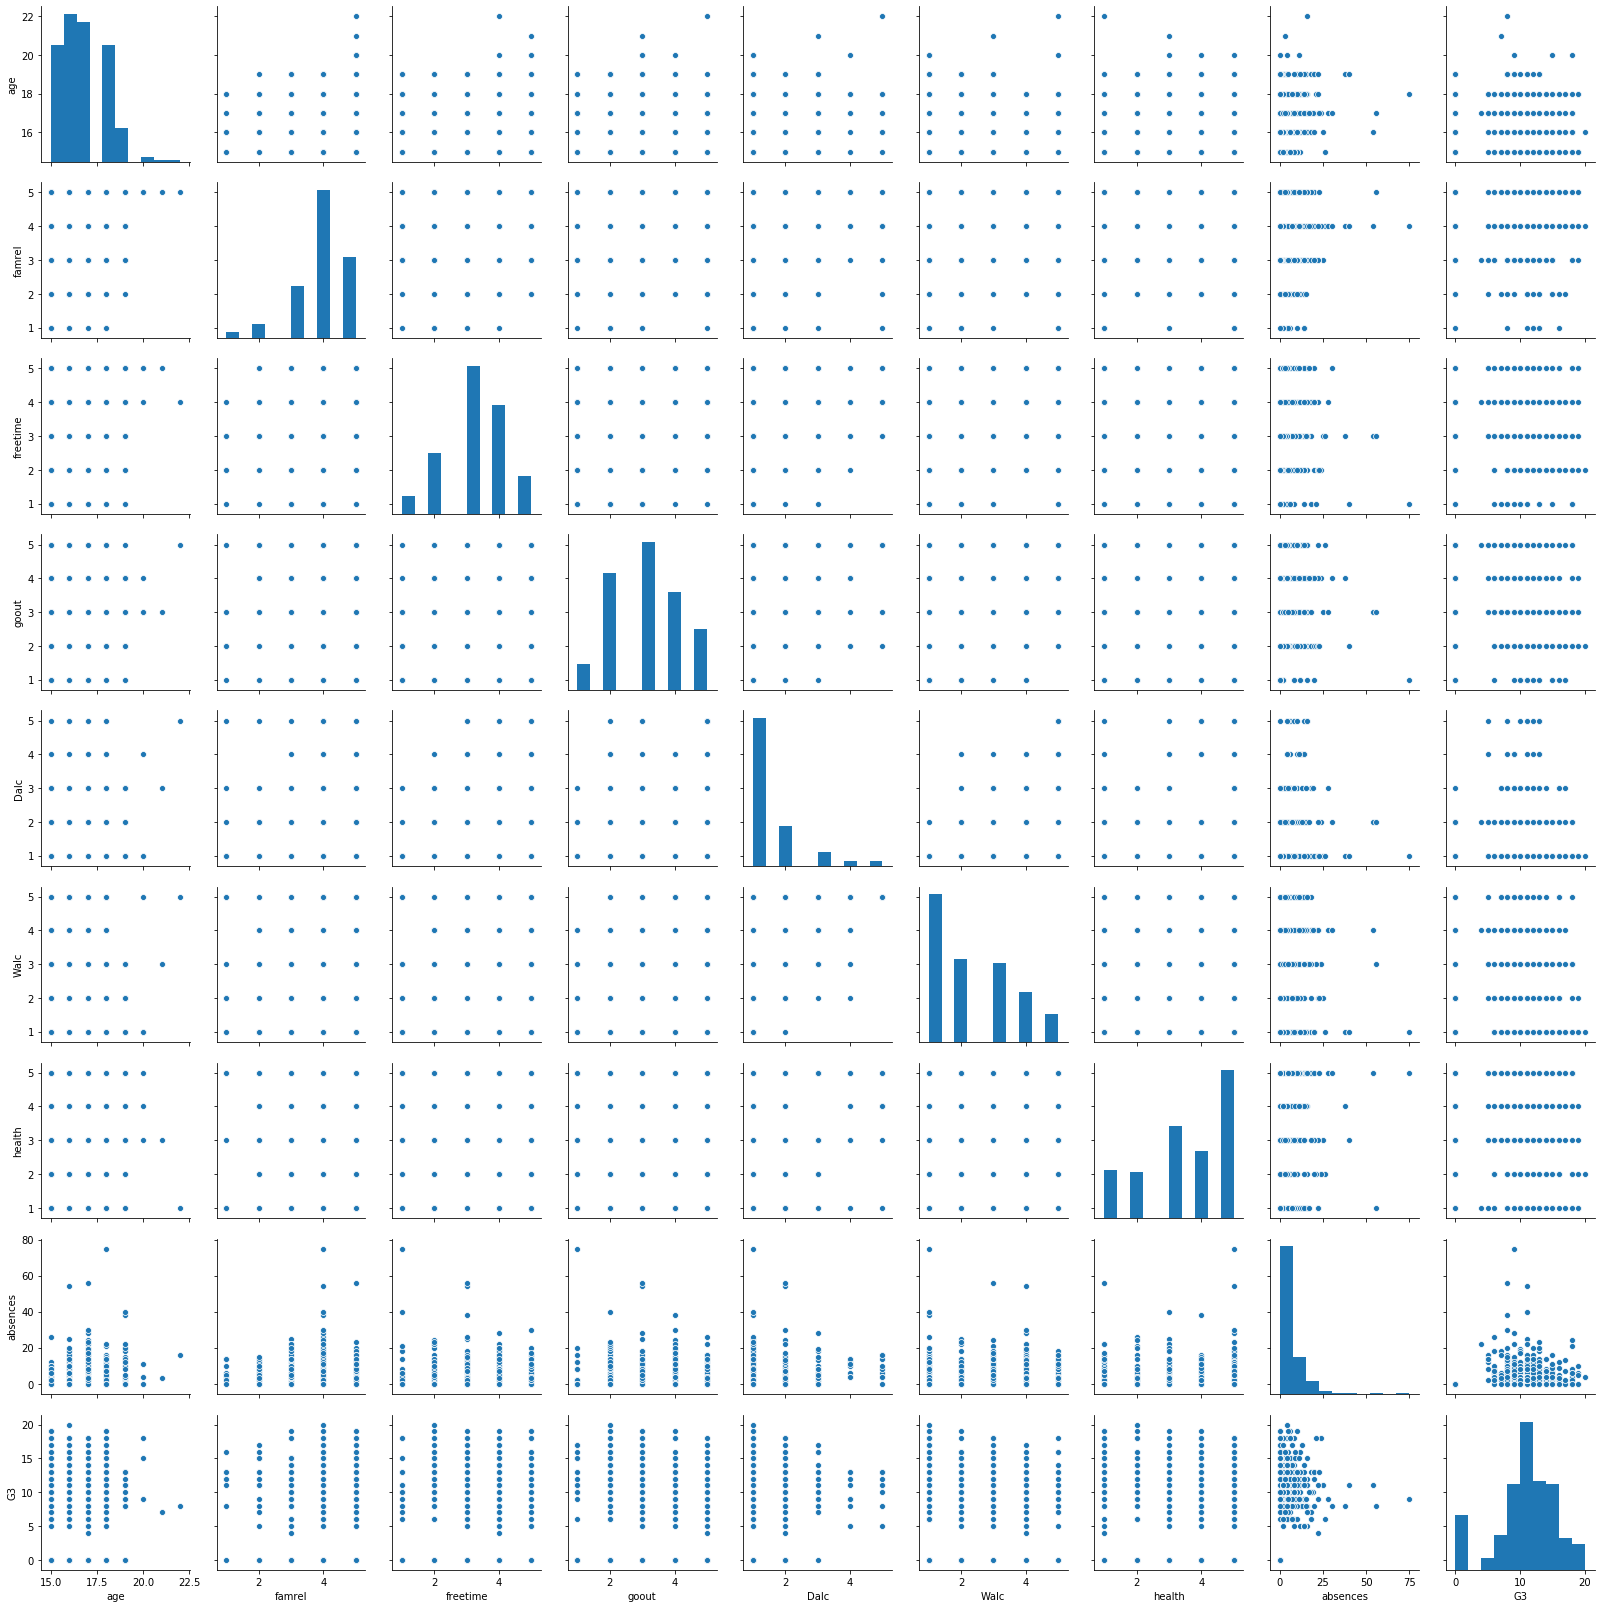

In [9]:
look_vars = student[['age', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']]
sns.pairplot(look_vars)

In [11]:
x = student.drop(['G3'], axis = 1)
y = student[['G3']]

In [15]:
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp.fit(x)
transformed_X = imp.transform(x)

#Need to label encode variables
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, transformed_X, y.values.ravel(), cv=5)

AttributeError: 'DataFrame' object has no attribute 'dtype'